In [14]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Load the dataset
# data = pd.read_csv('weather_data.csv')

# # Check for missing values and data types
# print("Missing values:\n", data.isnull().sum())
# print("Data types before conversion:\n", data.dtypes)

# # Ensure that 'YEAR', 'MO', and 'DY' are integers and convert them if necessary
# data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce').fillna(0).astype(int)
# data['MO'] = pd.to_numeric(data['MO'], errors='coerce').fillna(0).astype(int)
# data['DY'] = pd.to_numeric(data['DY'], errors='coerce').fillna(0).astype(int)

# # Function to create a date
# def create_date(row):
#     try:
#         year = int(row['YEAR'])
#         month = int(row['MO'])
#         day = int(row['DY'])
#         return pd.Timestamp(year=year, month=month, day=day)
#     except ValueError:
#         return pd.NaT  # Return Not-a-Time if the date is invalid

# # Apply the function to create a new date column
# data['Date'] = data.apply(create_date, axis=1)

# # Check for rows where conversion failed
# if data['Date'].isnull().any():
#     print("Rows with invalid dates:\n", data[data['Date'].isnull()])

# # Extract features and target variable
# # Example: predicting temperature
# X = data[['LAT', 'LON', 'Date']].copy()

# # Extracting year, month, day as separate features
# X['Year'] = X['Date'].dt.year
# X['Month'] = X['Date'].dt.month
# X['Day'] = X['Date'].dt.day

# # Target variable
# y = data['Temperature']

# # Drop any rows with NaN values in features or target
# X = X.dropna()
# y = y[X.index]  # Ensure y matches the cleaned X

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y, test_size=0.2, random_state=42)

# # Initialize the Linear Regression model
# model = LinearRegression()

# # Fit the model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Calculate Mean Squared Error
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# # Function to predict temperature for a given lat, lon, date
# def predict_temperature(lat, lon, date):
#     date_obj = pd.to_datetime(date)  # e.g., '2024-01-01'
#     features = np.array([[lat, lon, date_obj.year, date_obj.month, date_obj.day]])
#     return model.predict(features)

# # Example of predicting temperature for specific lat, lon on a specific date
# lat = 15.25
# lon = 72.25
# date = '2024-01-01'
# predicted_temp = predict_temperature(lat, lon, date)
# print(f'Predicted Temperature: {predicted_temp[0]}°C')


In [15]:
# import matplotlib.pyplot as plt

# # Plotting predicted vs actual temperatures
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual Temperature')
# plt.ylabel('Predicted Temperature')
# plt.title('Predicted vs Actual Temperatures')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
# plt.show()


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('data/weather_data.csv')

# Check for missing values and data types
print("Missing values:\n", data.isnull().sum())
print("Data types before conversion:\n", data.dtypes)

# Ensure that 'YEAR', 'MO', and 'DY' are integers and convert them if necessary
data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce').fillna(0).astype(int)
data['MO'] = pd.to_numeric(data['MO'], errors='coerce').fillna(0).astype(int)
data['DY'] = pd.to_numeric(data['DY'], errors='coerce').fillna(0).astype(int)

# Function to create a date
def create_date(row):
    try:
        year = int(row['YEAR'])
        month = int(row['MO'])
        day = int(row['DY'])
        return pd.Timestamp(year=year, month=month, day=day)
    except ValueError:
        return pd.NaT  # Return Not-a-Time if the date is invalid

# Apply the function to create a new date column
data['Date'] = data.apply(create_date, axis=1)

# Check for rows where conversion failed
if data['Date'].isnull().any():
    print("Rows with invalid dates:\n", data[data['Date'].isnull()])

# Extract features
X = data[['LAT', 'LON', 'Date']].copy()

# Extracting year, month, day as separate features
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

# Define target variables
y_temp = data['Temperature']
y_rainfall = data['Precipitation(mm/day)']
y_humidity = data['Humidity(g/kg)']
y_wind = data['Wind(m/s)']

# Drop any rows with NaN values in features or target
X = X.dropna()
y_temp = y_temp[X.index]  # Ensure y_temp matches the cleaned X
y_rainfall = y_rainfall[X.index]  # Ensure y_rainfall matches the cleaned X
y_humidity = y_humidity[X.index]  # Ensure y_humidity matches the cleaned X
y_wind = y_wind[X.index]  # Ensure y_wind matches the cleaned X

# Split the dataset into training and testing sets for each target variable
X_train, X_test, y_train_temp, y_test_temp = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_temp, test_size=0.2, random_state=42)
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_rainfall, test_size=0.2, random_state=42)
X_train_hum, X_test_hum, y_train_hum, y_test_hum = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_humidity, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_wind, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model_temp = LinearRegression()
model_rain = LinearRegression()
model_hum = LinearRegression()
model_wind = LinearRegression()
# model_rain = RandomForestRegressor(n_estimators=100, random_state=42)


# Fit the models
model_temp.fit(X_train, y_train_temp)
model_rain.fit(X_train_rain, y_train_rain)
model_hum.fit(X_train_hum, y_train_hum)
model_wind.fit(X_train_wind, y_train_wind)
# model_rain.fit(X_train_rain, y_train_rain)


# Make predictions
y_pred_temp = model_temp.predict(X_test)
y_pred_rain = model_rain.predict(X_test_rain)
y_pred_hum = model_hum.predict(X_test_hum)
y_pred_wind = model_wind.predict(X_test_wind)
# y_pred_rain = model_rain.predict(X_test_rain)


# Calculate Mean Squared Error for each target variable
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
mse_rain = mean_squared_error(y_test_rain, y_pred_rain)
mse_hum = mean_squared_error(y_test_hum, y_pred_hum)
mse_wind = mean_squared_error(y_test_wind, y_pred_wind)
# mse_rain = mean_squared_error(y_test_rain, y_pred_rain)

print(f'Mean Squared Error for Temperature: {mse_temp}')
print(f'Mean Squared Error for Rainfall: {mse_rain}')
print(f'Mean Squared Error for Humidity: {mse_hum}')
print(f'Mean Squared Error for Wind: {mse_wind}')
# print(f'Mean Squared Error for Rainfall using Random Forest: {mse_rain}')


# Function to predict for a given lat, lon, date
def predict_all(lat, lon, date):
    date_obj = pd.to_datetime(date)  # e.g., '2024-01-01'
    features = np.array([[lat, lon, date_obj.year, date_obj.month, date_obj.day]])
    
    predicted_temp = model_temp.predict(features)
    predicted_rain = model_rain.predict(features)
    predicted_hum = model_hum.predict(features)
    predicted_wind = model_wind.predict(features)
    # predicted_rain = model_rain.predict(features)


    
    return predicted_temp[0], predicted_rain[0], predicted_hum[0], predicted_wind[0]

# Example of predicting all variables for specific lat, lon on a specific date
lat = 22.75
lon = 74.25
date = '2024-10-13'
predicted_temp, predicted_rain, predicted_hum, predicted_wind = predict_all(lat, lon, date)
print(f'Predicted Temperature: {predicted_temp}°C')
print(f'Predicted Rainfall: {predicted_rain} mm/day')
print(f'Predicted Humidity: {predicted_hum} g/kg')
print(f'Predicted Wind: {predicted_wind} m/s')


Missing values:
 LAT                      0
LON                      0
YEAR                     0
MO                       0
DY                       0
Temperature              0
Precipitation(mm/day)    0
Humidity(g/kg)           0
Wind(m/s)                0
dtype: int64
Data types before conversion:
 LAT                      float64
LON                      float64
YEAR                       int64
MO                         int64
DY                         int64
Temperature              float64
Precipitation(mm/day)    float64
Humidity(g/kg)           float64
Wind(m/s)                float64
dtype: object
Mean Squared Error for Temperature: 11.710491827400181
Mean Squared Error for Rainfall: 71.13311049418239
Mean Squared Error for Humidity: 16.717271573651875
Mean Squared Error for Wind: 2.777822141290905
Predicted Temperature: 25.43633482567287°C
Predicted Rainfall: 3.6555196158655576 mm/day
Predicted Humidity: 14.427836273848314 g/kg
Predicted Wind: 3.876440626021985 m/s


d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('data/rain_humidity.csv')

# Check for missing values and data types
print("Missing values:\n", data.isnull().sum())
print("Data types before conversion:\n", data.dtypes)

# Ensure that 'YEAR', 'MO', and 'DY' are integers and convert them if necessary
data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce').fillna(0).astype(int)
data['MO'] = pd.to_numeric(data['MO'], errors='coerce').fillna(0).astype(int)
data['DY'] = pd.to_numeric(data['DY'], errors='coerce').fillna(0).astype(int)

# Function to create a date
def create_date(row):
    try:
        year = int(row['YEAR'])
        month = int(row['MO'])
        day = int(row['DY'])
        return pd.Timestamp(year=year, month=month, day=day)
    except ValueError:
        return pd.NaT  # Return Not-a-Time if the date is invalid

# Apply the function to create a new date column
data['Date'] = data.apply(create_date, axis=1)

# Check for rows where conversion failed
if data['Date'].isnull().any():
    print("Rows with invalid dates:\n", data[data['Date'].isnull()])

# Extract features
X = data[['LAT', 'LON', 'Date']].copy()

# Extracting year, month, day as separate features
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

# Drop any rows with NaN values in features
X = X.dropna()

# Define target variables: Precipitation (Rainfall) and Humidity
y_rainfall = data['Precipitation']  # Assuming the column name is 'Precipitation'
y_humidity = data['Humidity']       # Assuming the column name is 'Humidity'

# Ensure target variables match the cleaned X
y_rainfall = y_rainfall[X.index]
y_humidity = y_humidity[X.index]

# Split the dataset into training and testing sets
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_rainfall, test_size=0.2, random_state=42)
X_train_hum, X_test_hum, y_train_hum, y_test_hum = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_humidity, test_size=0.2, random_state=42)

# Initialize models for both Linear Regression and Random Forest
model_rain_lr = LinearRegression()
model_rain_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_hum_lr = LinearRegression()
model_hum_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models (Linear Regression and Random Forest) for both Rainfall and Humidity
model_rain_lr.fit(X_train_rain, y_train_rain)
model_rain_rf.fit(X_train_rain, y_train_rain)
model_hum_lr.fit(X_train_hum, y_train_hum)
model_hum_rf.fit(X_train_hum, y_train_hum)

# Make predictions using both models
y_pred_rain_lr = model_rain_lr.predict(X_test_rain)
y_pred_rain_rf = model_rain_rf.predict(X_test_rain)
y_pred_hum_lr = model_hum_lr.predict(X_test_hum)
y_pred_hum_rf = model_hum_rf.predict(X_test_hum)

# Calculate Mean Squared Error for each model
mse_rain_lr = mean_squared_error(y_test_rain, y_pred_rain_lr)
mse_rain_rf = mean_squared_error(y_test_rain, y_pred_rain_rf)
mse_hum_lr = mean_squared_error(y_test_hum, y_pred_hum_lr)
mse_hum_rf = mean_squared_error(y_test_hum, y_pred_hum_rf)

print(f'Mean Squared Error for Rainfall (Linear Regression): {mse_rain_lr}')
print(f'Mean Squared Error for Rainfall (Random Forest): {mse_rain_rf}')
print(f'Mean Squared Error for Humidity (Linear Regression): {mse_hum_lr}')
print(f'Mean Squared Error for Humidity (Random Forest): {mse_hum_rf}')

# Function to predict Rainfall and Humidity for a given lat, lon, date
def predict_rain_humidity(lat, lon, date):
    date_obj = pd.to_datetime(date)  # e.g., '2024-01-01'
    features = np.array([[lat, lon, date_obj.year, date_obj.month, date_obj.day]])

    predicted_rain_lr = model_rain_lr.predict(features)
    predicted_rain_rf = model_rain_rf.predict(features)
    predicted_hum_lr = model_hum_lr.predict(features)
    predicted_hum_rf = model_hum_rf.predict(features)

    return predicted_rain_lr[0], predicted_rain_rf[0], predicted_hum_lr[0], predicted_hum_rf[0]

# Example of predicting for a specific lat, lon on a specific date
lat = 22.75
lon = 74.25
date = '2024-06-29'
predicted_rain_lr, predicted_rain_rf, predicted_hum_lr, predicted_hum_rf = predict_rain_humidity(lat, lon, date)

print(f'Predicted Rainfall (Linear Regression): {predicted_rain_lr} mm/day')
print(f'Predicted Rainfall (Random Forest): {predicted_rain_rf} mm/day')
print(f'Predicted Humidity (Linear Regression): {predicted_hum_lr} g/kg')
print(f'Predicted Humidity (Random Forest): {predicted_hum_rf} g/kg')


Missing values:
 LAT              0
LON              0
YEAR             0
MO               0
DY               0
Precipitation    0
Humidity         0
dtype: int64
Data types before conversion:
 LAT              float64
LON              float64
YEAR               int64
MO                 int64
DY                 int64
Precipitation    float64
Humidity         float64
dtype: object
Mean Squared Error for Rainfall (Linear Regression): 71.13311049418239
Mean Squared Error for Rainfall (Random Forest): 2.354100141679639
Mean Squared Error for Humidity (Linear Regression): 267.87193391607076
Mean Squared Error for Humidity (Random Forest): 2.4633798286799524
Predicted Rainfall (Linear Regression): 4.1585224586200304 mm/day
Predicted Rainfall (Random Forest): 28.87289999999996 mm/day
Predicted Humidity (Linear Regression): 57.51467814138067 g/kg
Predicted Humidity (Random Forest): 85.51329999999989 g/kg


d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset from Code 1 (combined weather data)
data = pd.read_csv('data/weather_data.csv')

# Check for missing values and data types
print("Missing values:\n", data.isnull().sum())
print("Data types before conversion:\n", data.dtypes)

# Ensure that 'YEAR', 'MO', and 'DY' are integers and convert them if necessary
data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce').fillna(0).astype(int)
data['MO'] = pd.to_numeric(data['MO'], errors='coerce').fillna(0).astype(int)
data['DY'] = pd.to_numeric(data['DY'], errors='coerce').fillna(0).astype(int)

# Function to create a date
def create_date(row):
    try:
        year = int(row['YEAR'])
        month = int(row['MO'])
        day = int(row['DY'])
        return pd.Timestamp(year=year, month=month, day=day)
    except ValueError:
        return pd.NaT  # Return Not-a-Time if the date is invalid

# Apply the function to create a new date column
data['Date'] = data.apply(create_date, axis=1)

# Check for rows where conversion failed
if data['Date'].isnull().any():
    print("Rows with invalid dates:\n", data[data['Date'].isnull()])

# Extract features
X = data[['LAT', 'LON', 'Date']].copy()

# Extracting year, month, day as separate features
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

# Drop any rows with NaN values in features
X = X.dropna()

# Define target variables
y_temp = data['Temperature']
y_wind = data['Wind(m/s)']
y_rainfall = data['Precipitation(mm/day)']  # or 'Precipitation'
y_humidity = data['Humidity (%)']          # or 'Humidity'

# Ensure target variables match the cleaned X
y_temp = y_temp[X.index]
y_wind = y_wind[X.index]
y_rainfall = y_rainfall[X.index]
y_humidity = y_humidity[X.index]

# Split the dataset into training and testing sets for each target variable
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_temp, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_wind, test_size=0.2, random_state=42)
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_rainfall, test_size=0.2, random_state=42)
X_train_hum, X_test_hum, y_train_hum, y_test_hum = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_humidity, test_size=0.2, random_state=42)

# Initialize models for each target variable
model_temp = LinearRegression()
model_wind = LinearRegression()
model_rain_lr = LinearRegression()
model_rain_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_hum_lr = LinearRegression()
model_hum_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models
model_temp.fit(X_train_temp, y_train_temp)
model_wind.fit(X_train_wind, y_train_wind)
model_rain_lr.fit(X_train_rain, y_train_rain)
model_rain_rf.fit(X_train_rain, y_train_rain)
model_hum_lr.fit(X_train_hum, y_train_hum)
model_hum_rf.fit(X_train_hum, y_train_hum)

# Make predictions
y_pred_temp = model_temp.predict(X_test_temp)
y_pred_wind = model_wind.predict(X_test_wind)
y_pred_rain_lr = model_rain_lr.predict(X_test_rain)
y_pred_rain_rf = model_rain_rf.predict(X_test_rain)
y_pred_hum_lr = model_hum_lr.predict(X_test_hum)
y_pred_hum_rf = model_hum_rf.predict(X_test_hum)

# Calculate Mean Squared Error for each target variable
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
mse_wind = mean_squared_error(y_test_wind, y_pred_wind)
mse_rain_lr = mean_squared_error(y_test_rain, y_pred_rain_lr)
mse_rain_rf = mean_squared_error(y_test_rain, y_pred_rain_rf)
mse_hum_lr = mean_squared_error(y_test_hum, y_pred_hum_lr)
mse_hum_rf = mean_squared_error(y_test_hum, y_pred_hum_rf)

print(f'Mean Squared Error for Temperature: {mse_temp}')
print(f'Mean Squared Error for Wind: {mse_wind}')
print(f'Mean Squared Error for Rainfall (Linear Regression): {mse_rain_lr}')
print(f'Mean Squared Error for Rainfall (Random Forest): {mse_rain_rf}')
print(f'Mean Squared Error for Humidity (Linear Regression): {mse_hum_lr}')
print(f'Mean Squared Error for Humidity (Random Forest): {mse_hum_rf}')

# Function to predict all variables (Temperature, Wind, Rainfall, Humidity) for a given lat, lon, date
def predict_all(lat, lon, date):
    date_obj = pd.to_datetime(date)  # e.g., '2024-01-01'
    features = np.array([[lat, lon, date_obj.year, date_obj.month, date_obj.day]])
    
    predicted_temp = model_temp.predict(features)
    predicted_wind = model_wind.predict(features)
    predicted_rain_lr = model_rain_lr.predict(features)
    predicted_rain_rf = model_rain_rf.predict(features)
    predicted_hum_lr = model_hum_lr.predict(features)
    predicted_hum_rf = model_hum_rf.predict(features)

    return predicted_temp[0], predicted_wind[0], predicted_rain_lr[0], predicted_rain_rf[0], predicted_hum_lr[0], predicted_hum_rf[0]

# Example of predicting all variables for a specific lat, lon on a specific date
lat = 22.75
lon = 74.25
date = '2024-10-13'
predicted_temp, predicted_wind, predicted_rain_lr, predicted_rain_rf, predicted_hum_lr, predicted_hum_rf = predict_all(lat, lon, date)

print(f'Predicted Temperature: {predicted_temp}°C')
print(f'Predicted Wind: {predicted_wind} m/s')
print(f'Predicted Rainfall (Linear Regression): {predicted_rain_lr} mm/day')
print(f'Predicted Rainfall (Random Forest): {predicted_rain_rf} mm/day')
print(f'Predicted Humidity (Linear Regression): {predicted_hum_lr} g/kg')
print(f'Predicted Humidity (Random Forest): {predicted_hum_rf} %')


Missing values:
 LAT                      0
LON                      0
YEAR                     0
MO                       0
DY                       0
Temperature              0
Precipitation(mm/day)    0
Humidity (%)             0
Wind(m/s)                0
dtype: int64
Data types before conversion:
 LAT                      float64
LON                      float64
YEAR                       int64
MO                         int64
DY                         int64
Temperature              float64
Precipitation(mm/day)    float64
Humidity (%)             float64
Wind(m/s)                float64
dtype: object
Mean Squared Error for Temperature: 11.710491827400181
Mean Squared Error for Wind: 2.777822141290905
Mean Squared Error for Rainfall (Linear Regression): 71.13311049418239
Mean Squared Error for Rainfall (Random Forest): 2.354100141679639
Mean Squared Error for Humidity (Linear Regression): 267.87193391607076
Mean Squared Error for Humidity (Random Forest): 2.4633798286799524
Predi

d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have vali

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset (using the file path from the first code)
data = pd.read_csv('data/weather_data.csv')

# Ensure 'YEAR', 'MO', and 'DY' are integers
data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce').fillna(0).astype(int)
data['MO'] = pd.to_numeric(data['MO'], errors='coerce').fillna(0).astype(int)
data['DY'] = pd.to_numeric(data['DY'], errors='coerce').fillna(0).astype(int)

# Function to create a date
def create_date(row):
    try:
        year = int(row['YEAR'])
        month = int(row['MO'])
        day = int(row['DY'])
        return pd.Timestamp(year=year, month=month, day=day)
    except ValueError:
        return pd.NaT

# Apply the function to create a new date column
data['Date'] = data.apply(create_date, axis=1)

# Extract features
X = data[['LAT', 'LON', 'Date']].copy()

# Extracting year, month, and day as separate features
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

# Define target variables
y_temp = data['Temperature']
y_wind = data['Wind(m/s)']
y_rainfall = data['Precipitation(mm/day)']
y_humidity = data['Humidity (%)']

# Drop any rows with NaN values in features or target
X = X.dropna()
y_temp = y_temp[X.index]  # Ensure y_temp matches the cleaned X
y_wind = y_wind[X.index]  # Ensure y_wind matches the cleaned X
y_rainfall = y_rainfall[X.index]  # Ensure y_rainfall matches the cleaned X
y_humidity = y_humidity[X.index]  # Ensure y_humidity matches the cleaned X

# Split the dataset into training and testing sets for wind and temperature
X_train_temp_wind, X_test_temp_wind, y_train_temp, y_test_temp = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_temp, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_wind, test_size=0.2, random_state=42)

# Split the dataset into training and testing sets for rainfall and humidity
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_rainfall, test_size=0.2, random_state=42)
X_train_hum, X_test_hum, y_train_hum, y_test_hum = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_humidity, test_size=0.2, random_state=42)

# Initialize Random Forest models
model_wind_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_temp_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rain_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_hum_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models for wind, temperature, rainfall, and humidity
model_wind_rf.fit(X_train_wind, y_train_wind)
model_temp_rf.fit(X_train_temp_wind, y_train_temp)
model_rain_rf.fit(X_train_rain, y_train_rain)
model_hum_rf.fit(X_train_hum, y_train_hum)

# Make predictions
y_pred_wind_rf = model_wind_rf.predict(X_test_wind)
y_pred_temp_rf = model_temp_rf.predict(X_test_temp_wind)
y_pred_rain_rf = model_rain_rf.predict(X_test_rain)
y_pred_hum_rf = model_hum_rf.predict(X_test_hum)

# Calculate Mean Squared Error for each model
mse_wind_rf = mean_squared_error(y_test_wind, y_pred_wind_rf)
mse_temp_rf = mean_squared_error(y_test_temp, y_pred_temp_rf)
mse_rain_rf = mean_squared_error(y_test_rain, y_pred_rain_rf)
mse_hum_rf = mean_squared_error(y_test_hum, y_pred_hum_rf)

print(f'Mean Squared Error for Wind (Random Forest): {mse_wind_rf}')
print(f'Mean Squared Error for Temperature (Random Forest): {mse_temp_rf}')
print(f'Mean Squared Error for Rainfall (Random Forest): {mse_rain_rf}')
print(f'Mean Squared Error for Humidity (Random Forest): {mse_hum_rf}')

# Function to predict wind, temperature, rainfall, and humidity for a given lat, lon, date
def predict_all(lat, lon, date):
    date_obj = pd.to_datetime(date)  # e.g., '2024-01-01'
    features = np.array([[lat, lon, date_obj.year, date_obj.month, date_obj.day]])

    predicted_wind_rf = model_wind_rf.predict(features)
    predicted_temp_rf = model_temp_rf.predict(features)
    predicted_rain_rf = model_rain_rf.predict(features)
    predicted_hum_rf = model_hum_rf.predict(features)

    return predicted_wind_rf[0], predicted_temp_rf[0], predicted_rain_rf[0], predicted_hum_rf[0]

# Example of predicting for a specific lat, lon on a specific date
lat = 22.75
lon = 74.25
date = '2024-09-24'
predicted_wind_rf, predicted_temp_rf, predicted_rain_rf, predicted_hum_rf = predict_all(lat, lon, date)

print(f'Predicted Wind: {predicted_wind_rf} m/s')
print(f'Predicted Temperature: {predicted_temp_rf}°C')
print(f'Predicted Rainfall: {predicted_rain_rf} mm/day')
print(f'Predicted Humidity: {predicted_hum_rf} g/kg')


Mean Squared Error for Wind (Random Forest): 0.05026955290473226
Mean Squared Error for Temperature (Random Forest): 0.07019989061799499
Mean Squared Error for Rainfall (Random Forest): 2.354100141679639
Mean Squared Error for Humidity (Random Forest): 2.4633798286799524
Predicted Wind: 2.926099999999997 m/s
Predicted Temperature: 26.463700000000017°C
Predicted Rainfall: 5.326400000000009 mm/day
Predicted Humidity: 90.02950000000003 g/kg


d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
d:\New-Programs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Mean Squared Error for Temperature (Random Forest): 0.07019989061799499
Mean Squared Error for Wind (Random Forest): 0.05026955290473226
Mean Squared Error for Rainfall (Random Forest): 2.354100141679639
Mean Squared Error for Humidity (Random Forest): 2.4633798286799524


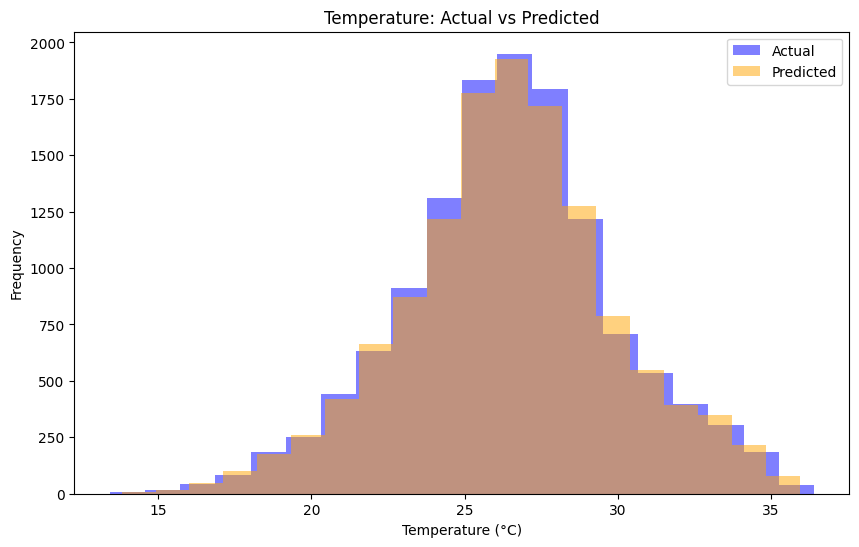

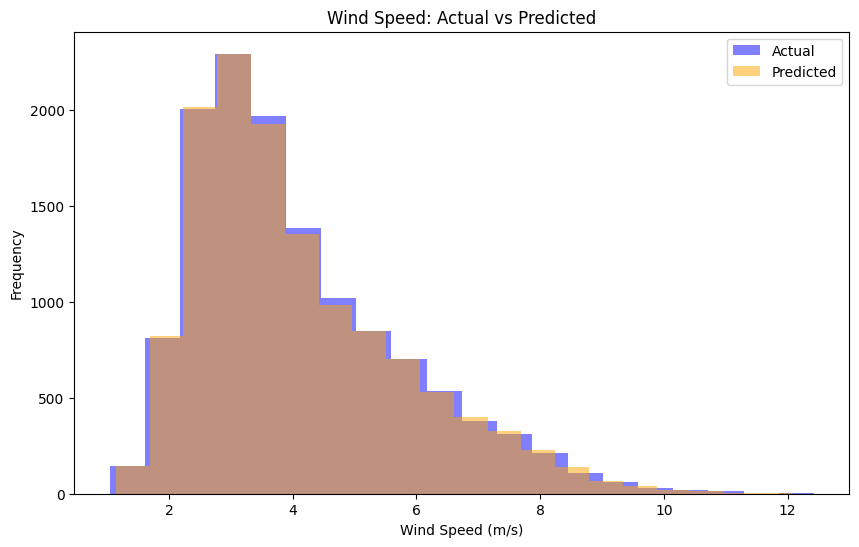

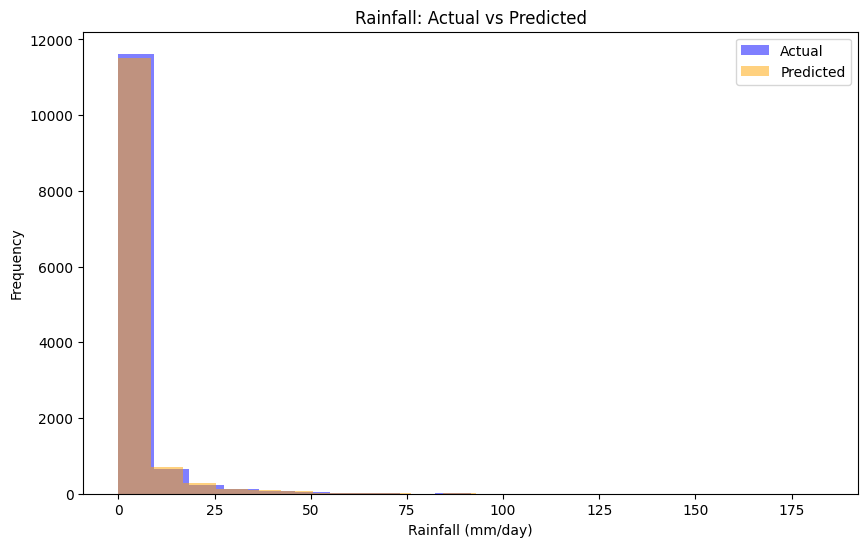

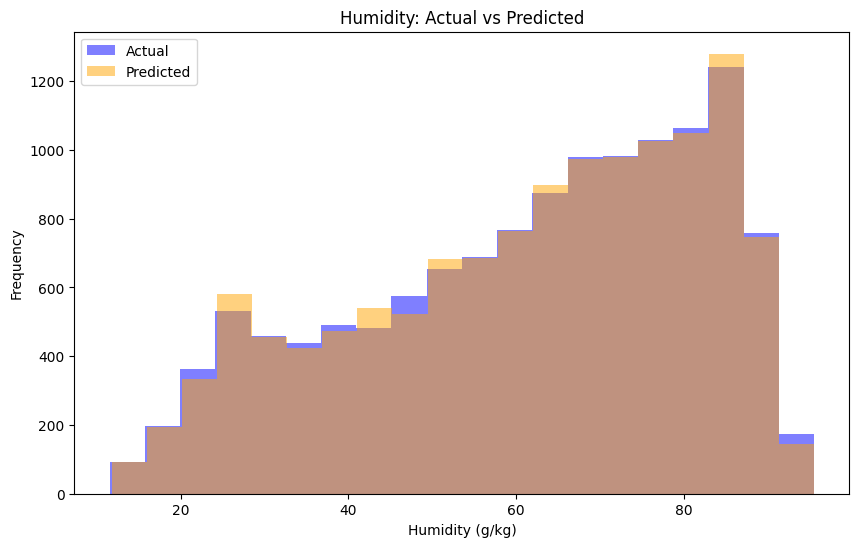

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('data/weather_data.csv')

# Ensure 'YEAR', 'MO', and 'DY' are integers
data['YEAR'] = pd.to_numeric(data['YEAR'], errors='coerce').fillna(0).astype(int)
data['MO'] = pd.to_numeric(data['MO'], errors='coerce').fillna(0).astype(int)
data['DY'] = pd.to_numeric(data['DY'], errors='coerce').fillna(0).astype(int)

# Function to create a date
def create_date(row):
    try:
        year = int(row['YEAR'])
        month = int(row['MO'])
        day = int(row['DY'])
        return pd.Timestamp(year=year, month=month, day=day)
    except ValueError:
        return pd.NaT

# Apply the function to create a new date column
data['Date'] = data.apply(create_date, axis=1)

# Extract features
X = data[['LAT', 'LON', 'Date']].copy()
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

# Define target variables
y_temp = data['Temperature']
y_wind = data['Wind(m/s)']
y_rainfall = data['Precipitation(mm/day)']
y_humidity = data['Humidity (%)']

# Drop NaN values
X = X.dropna()
y_temp = y_temp[X.index]
y_wind = y_wind[X.index]
y_rainfall = y_rainfall[X.index]
y_humidity = y_humidity[X.index]

# Split the dataset into training and testing sets
X_train, X_test, y_train_temp, y_test_temp = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_temp, test_size=0.2, random_state=42)
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_wind, test_size=0.2, random_state=42)
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_rainfall, test_size=0.2, random_state=42)
X_train_hum, X_test_hum, y_train_hum, y_test_hum = train_test_split(X[['LAT', 'LON', 'Year', 'Month', 'Day']], y_humidity, test_size=0.2, random_state=42)

# Initialize Random Forest models
model_temp_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_wind_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rain_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_hum_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models
model_temp_rf.fit(X_train, y_train_temp)
model_wind_rf.fit(X_train_wind, y_train_wind)
model_rain_rf.fit(X_train_rain, y_train_rain)
model_hum_rf.fit(X_train_hum, y_train_hum)

# Make predictions
y_pred_temp_rf = model_temp_rf.predict(X_test)
y_pred_wind_rf = model_wind_rf.predict(X_test_wind)
y_pred_rain_rf = model_rain_rf.predict(X_test_rain)
y_pred_hum_rf = model_hum_rf.predict(X_test_hum)

# Calculate Mean Squared Error for each model
mse_temp_rf = mean_squared_error(y_test_temp, y_pred_temp_rf)
mse_wind_rf = mean_squared_error(y_test_wind, y_pred_wind_rf)
mse_rain_rf = mean_squared_error(y_test_rain, y_pred_rain_rf)
mse_hum_rf = mean_squared_error(y_test_hum, y_pred_hum_rf)

print(f'Mean Squared Error for Temperature (Random Forest): {mse_temp_rf}')
print(f'Mean Squared Error for Wind (Random Forest): {mse_wind_rf}')
print(f'Mean Squared Error for Rainfall (Random Forest): {mse_rain_rf}')
print(f'Mean Squared Error for Humidity (Random Forest): {mse_hum_rf}')

# Visualize predicted data vs actual data using histograms
def plot_histogram(actual, predicted, title, xlabel):
    plt.figure(figsize=(10, 6))
    plt.hist(actual, bins=20, alpha=0.5, label='Actual', color='blue')
    plt.hist(predicted, bins=20, alpha=0.5, label='Predicted', color='orange')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_histogram(y_test_temp, y_pred_temp_rf, 'Temperature: Actual vs Predicted', 'Temperature (°C)')
plot_histogram(y_test_wind, y_pred_wind_rf, 'Wind Speed: Actual vs Predicted', 'Wind Speed (m/s)')
plot_histogram(y_test_rain, y_pred_rain_rf, 'Rainfall: Actual vs Predicted', 'Rainfall (mm/day)')
plot_histogram(y_test_hum, y_pred_hum_rf, 'Humidity: Actual vs Predicted', 'Humidity (g/kg)')

# Function to visualize geographic data (plot latitude and longitude on a map)
def plot_on_map(latitudes, longitudes, values, title, color_label):
    fig = px.scatter_geo(
        lat=latitudes, lon=longitudes,
        color=values,
        color_continuous_scale='Viridis',
        title=title,
        labels={color_label: color_label}
    )
    fig.update_layout(geo_scope='world')  # Focus on global scale, modify to 'usa', 'europe' for regional
    fig.show()

# Plot actual vs predicted data on a map for Temperature
plot_on_map(X_test['LAT'], X_test['LON'], y_test_temp, "Actual Temperature", "Temperature (°C)")
plot_on_map(X_test['LAT'], X_test['LON'], y_pred_temp_rf, "Predicted Temperature", "Temperature (°C)")

# Plot actual vs predicted data on a map for Wind Speed
plot_on_map(X_test_wind['LAT'], X_test_wind['LON'], y_test_wind, "Actual Wind Speed", "Wind Speed (m/s)")
plot_on_map(X_test_wind['LAT'], X_test_wind['LON'], y_pred_wind_rf, "Predicted Wind Speed", "Wind Speed (m/s)")

# Plot actual vs predicted data on a map for Rainfall
plot_on_map(X_test_rain['LAT'], X_test_rain['LON'], y_test_rain, "Actual Rainfall", "Rainfall (mm/day)")
plot_on_map(X_test_rain['LAT'], X_test_rain['LON'], y_pred_rain_rf, "Predicted Rainfall", "Rainfall (mm/day)")

# Plot actual vs predicted data on a map for Humidity
plot_on_map(X_test_hum['LAT'], X_test_hum['LON'], y_test_hum, "Actual Humidity", "Humidity (g/kg)")
plot_on_map(X_test_hum['LAT'], X_test_hum['LON'], y_pred_hum_rf, "Predicted Humidity", "Humidity (g/kg)")


In [64]:
import nbformat
print(nbformat.__version__)


5.10.4
